<a href="https://colab.research.google.com/github/jjpal/practice_projects/blob/main/Dataquest%20Project/Visualizing%20Earnings%20Based%20On%20College%20Majors%20Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Working with a dataset on the job outcomes of students who graduated from college between 2010-2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.
https://github.com/fivethirtyeight/data/tree/master/college-majors


In [ ]:
#Import pandas and matplotlib into the environment.
#Add %matplotlib inline so that plots are displayed inline.
%matplotlib inline 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sns

In [ ]:
#Read the dataset into a DataFrame and start exploring the data.
recent_grads = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv')

In [ ]:
#Use DataFrame.iloc[] to return the first row formatted as a table.
print(recent_grads.iloc[[0]])

   Rank  Major_code                  Major   Total     Men  Women  \
0     1        2419  PETROLEUM ENGINEERING  2339.0  2057.0  282.0   

  Major_category  ShareWomen  Sample_size  Employed  ...  Part_time  \
0    Engineering    0.120564           36      1976  ...        270   

   Full_time_year_round  Unemployed  Unemployment_rate  Median  P25th   P75th  \
0                  1207          37           0.018381  110000  95000  125000   

   College_jobs  Non_college_jobs  Low_wage_jobs  
0          1534               364            193  

[1 rows x 21 columns]


In [ ]:
#print(recent_grads.columns)
#Use DataFrame.head() to become familiar with how the data is structured.
print(recent_grads.sample(17))

     Rank  Major_code                                       Major     Total  \
1       2        2416              MINING AND MINERAL ENGINEERING     756.0   
120   121        2301  EDUCATIONAL ADMINISTRATION AND SUPERVISION     804.0   
127   128        6211                      HOSPITALITY MANAGEMENT   43647.0   
116   117        4001     INTERCULTURAL AND INTERNATIONAL STUDIES   24650.0   
149   150        6000                                   FINE ARTS   74440.0   
20     21        2102                            COMPUTER SCIENCE  128319.0   
159   160        6007                                 STUDIO ARTS   16977.0   
5       6        2418                         NUCLEAR ENGINEERING    2573.0   
44     45        6105            MEDICAL TECHNOLOGIES TECHNICIANS   15914.0   
89     90        5401                       PUBLIC ADMINISTRATION    5629.0   
124   125        5507                                   SOCIOLOGY  115433.0   
140   141        3401                               

In [ ]:
#Use DataFrame.describe() to generate summary statistics for the numeric columns
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [ ]:
#Look up the number of rows in recent_grads and assign the value to raw_data_count.
raw_data_count = len(recent_grads)
print(raw_data_count)

173


In [ ]:
#Use DataFrame.dropna() to drop rows containing missing values 
#and assign the resulting DataFrame back to recent_grads
recent_grads = recent_grads.dropna()

In [ ]:
#Look up the number of rows in recent_grads now and assign the value to cleaned_data_count
cleaned_data_count = len(recent_grads)
print(cleaned_data_count)

173


<AxesSubplot:title={'center':'Employed vs. Sample_size'}, xlabel='Sample_size', ylabel='Employed'>

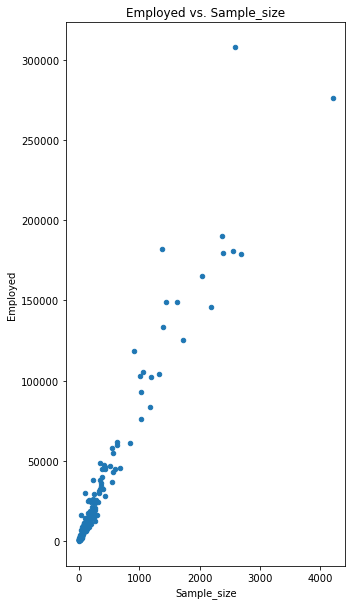

In [ ]:
#From Learn section
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter', title='Employed vs. Sample_size', figsize=(5,10))

Text(0.5, 1.0, 'Employed vs. Sample_size')

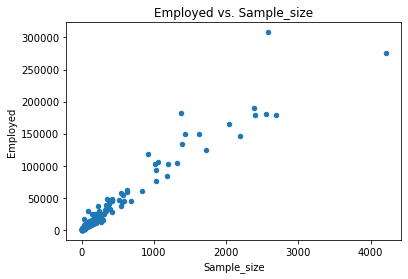

In [ ]:
##From Learn section
ax = recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')
ax.set_title('Employed vs. Sample_size')

Text(0.5, 1.0, 'Sample_size vs. Unemployment_rate')

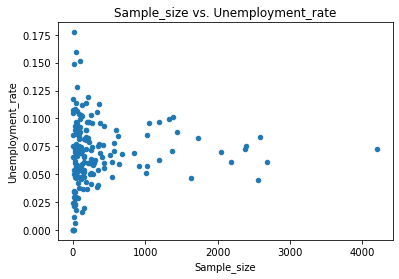

In [ ]:
#Generate scatter plots in separate cells to explore 
#the following relations: Sample_size and Median
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax.set_title('Sample_size vs. Unemployment_rate')

Text(0.5, 1.0, 'Sample_size vs. Median')

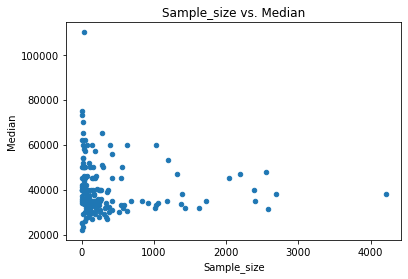

In [ ]:
#Generate scatter plots in separate cells to explore 
#the following relations: Sample_size and Median
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax.set_title('Sample_size vs. Median')

Text(0.5, 1.0, 'Sample_size vs. Unemployment_rate')

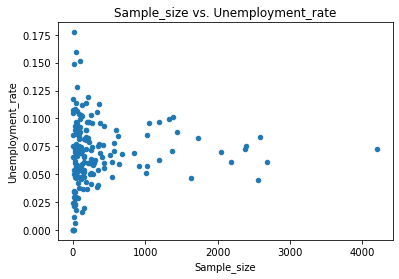

In [ ]:
#Generate scatter plots in separate cells to explore 
#the following relations: Sample_size and Unemployment_rate
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax.set_title('Sample_size vs. Unemployment_rate')

Text(0.5, 1.0, 'Full_time vs. Median')

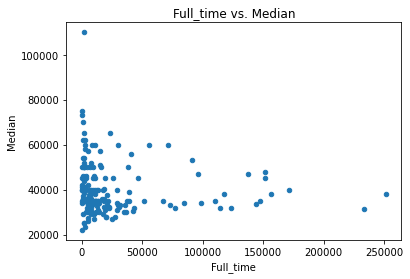

In [ ]:
#Generate scatter plots in separate cells to explore 
#the following relations: Full_time and Median
ax = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax.set_title('Full_time vs. Median')

Text(0.5, 1.0, 'ShareWomen vs. Unemployment_rate')

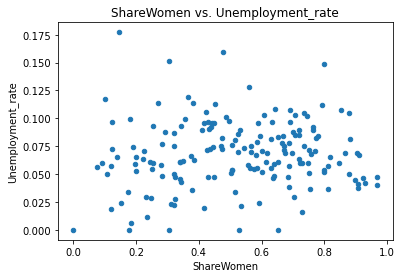

In [ ]:
#Generate scatter plots in separate cells to explore 
#the following relations: ShareWomen_size and Unemployment_rate
ax = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax.set_title('ShareWomen vs. Unemployment_rate')

Text(0.5, 1.0, 'Men vs. Median')

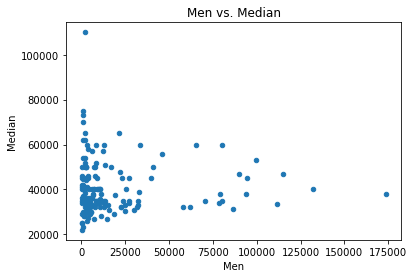

In [ ]:
#Generate scatter plots in separate cells to explore 
#the following relations: Men and Median
ax = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax.set_title('Men vs. Median')

Text(0.5, 1.0, 'Women vs. Median')

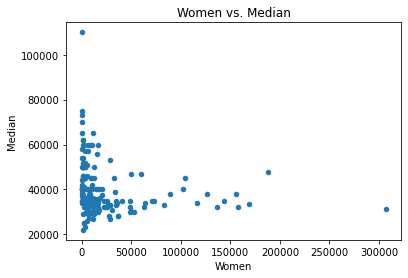

In [ ]:
#Generate scatter plots in separate cells to explore 
#the following relations: Women and Median
ax = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax.set_title('Women vs. Median')

Use the plots to explore the following questions:
Do students in more popular majors make more money?
Do students that majored in subjects that were majority female make more money?
Is there any link between the number of full-time employees and median salary?


<AxesSubplot:>

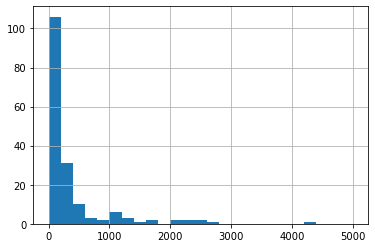

In [ ]:
#From the learn section
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

<AxesSubplot:>

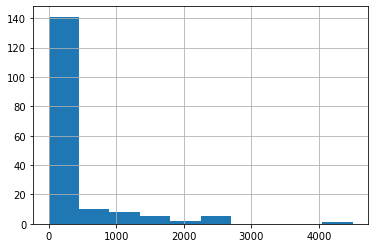

In [ ]:
#Generate histograms in separate cells to explore 
#the distributions of the column: Sample_size
recent_grads['Sample_size'].hist(bins=10, range=(0,4500))

<AxesSubplot:>

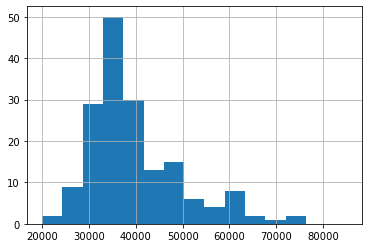

In [ ]:
#Generate histograms in separate cells to explore 
#the distributions of the column: Median
recent_grads['Median'].hist(bins=15, range=(20000,85000))

<AxesSubplot:>

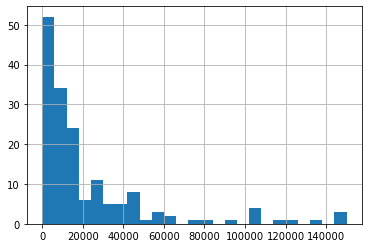

In [ ]:
#Generate histograms in separate cells to explore 
#the distributions of the column: Employed
recent_grads['Employed'].hist(bins=25, range=(0,150000))

<AxesSubplot:>

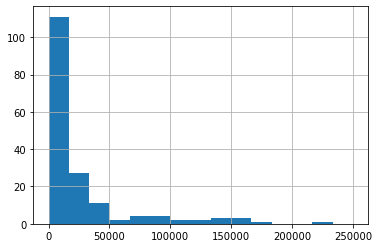

In [ ]:
#Generate histograms in separate cells to explore 
#the distributions of the column: Full_time
recent_grads['Full_time'].hist(bins=15, range=(0,250000))

<AxesSubplot:>

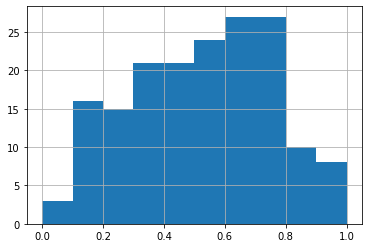

In [ ]:
#Generate histograms in separate cells to explore 
#the distributions of the column: ShareWomen
recent_grads['ShareWomen'].hist(bins=10, range=(0,1))

<AxesSubplot:>

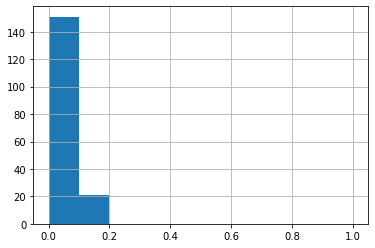

In [ ]:
#Generate histograms in separate cells to explore 
#the distributions of the column: Unemployment_rate
recent_grads['Unemployment_rate'].hist(bins=10, range=(0,1))

<AxesSubplot:>

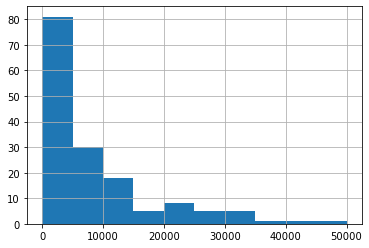

In [ ]:
#Generate histograms in separate cells to explore 
#the distributions of the column: Men
recent_grads['Men'].hist(bins=10, range=(0,50000))

<AxesSubplot:>

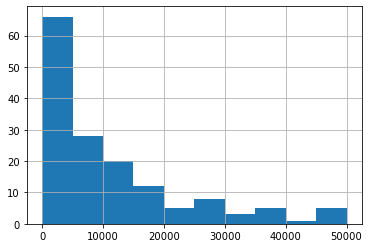

In [ ]:
#Generate histograms in separate cells to explore 
#the distributions of the column: Women
recent_grads['Women'].hist(bins=10, range=(0,50000))

Use the plots to explore the following questions:
What percent of majors are predominantly male? Predominantly female?
    What's the most common median salary range?


We created scatter plots to visualize potential relationships between columns 
Histograms to visualize the distributions of individual columns. 
A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously.

In [ ]:
#Import scatter_matrix from the pandas.plotting module.
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>]], dtype=object)

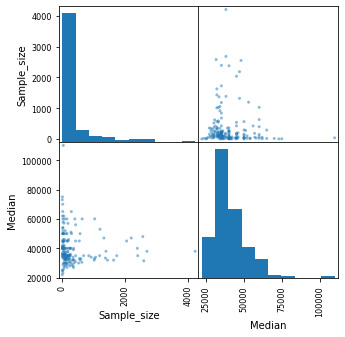

In [ ]:
#Create a 2 by 2 scatter matrix plot using the Sample_size and Median columns.
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(5,5))

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Median'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Unemployment_rate'>]],
      dtype=object)

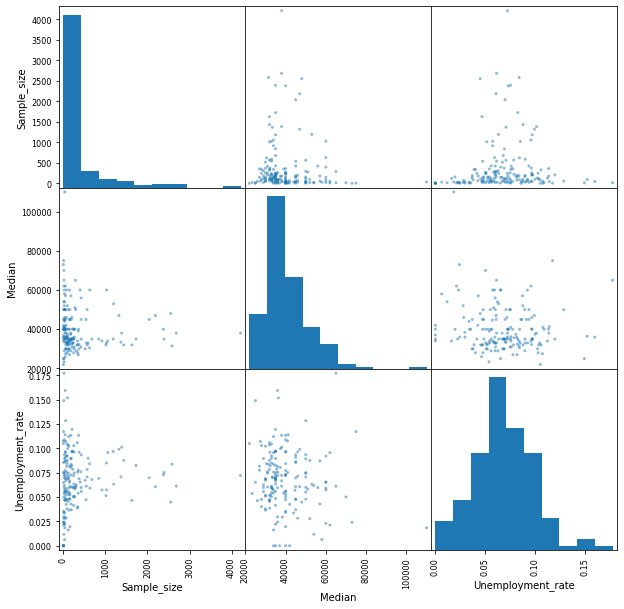

In [ ]:
#Create a 3 by 3 scatter matrix plot using the Sample_size, Median, and Unemployment_rate columns.
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

Explore the questions from the last few steps using these scatter matrix plots. You may need to create more scatter matrix plots.

Learn section
The code returns a bar plot of the first 5 values in the Women column
recent_grads[:5]['Women'].plot(kind='bar')

If use the df.plot.bar() method, we can use the x to specify the labels and y parameter to specify the data for the bars:
recent_grads[:5].plot.bar(x='Major', y='Women')

In [ ]:
recent_grads.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

<AxesSubplot:ylabel='Major'>

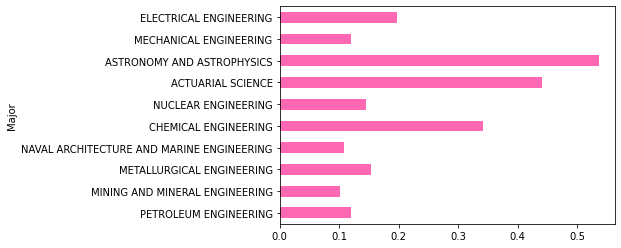

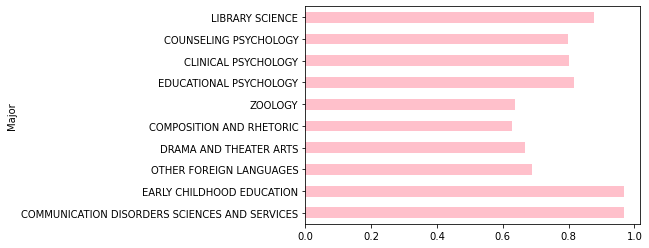

In [ ]:
recent_grads[:10].plot.barh(x='Major', y='ShareWomen', legend = False, color = "hotpink") # first 10
recent_grads[163:].plot.barh(x='Major', y='ShareWomen', legend = False, color = "pink") # last 10

Keep exploring these other visualizations on your own. Here are some ideas:
-~ Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
-? Use a box plot to explore the distributions of median salaries and unemployment rate.
-? Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.

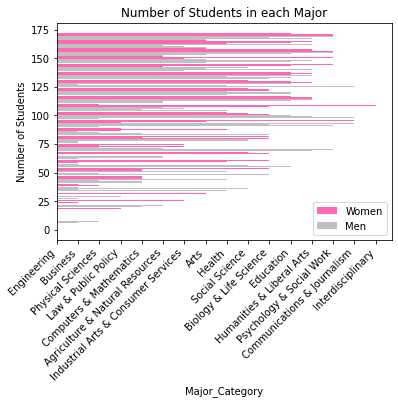

In [ ]:
# Use a grouped bar plot to compare the number of men with the number of women in each category of majors.

Ywomen = recent_grads['Women']             
Zmen = recent_grads['Men']
Major = recent_grads['Major_category']

X_axis = np.arange(cleaned_data_count)

plt.barh(X_axis - 0.2, Major, 0.5, label='Women', color = "hotpink")
plt.barh(X_axis + 0.2, Major, 0.5, label='Men',  color = "silver")

plt.xlabel("Major_Category")
plt.ylabel("Number of Students")
plt.title("Number of Students in each Major")
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),
 [Text(0, 0, '22000'),
  Text(1, 0, '23400'),
  Text(2, 0, '25000'),
  Text(3, 0, '26000'),
  Text(4, 0, '27000'),
  Text(5, 0, '27500'),
  Text(6, 0, '28000'),
  Text(7, 0, '29000'),
  Text(8, 0, '30000'),
  Text(9, 0, '30500'),
  Text(10, 0, '31000'),
  Text(11, 0, '31500'),
  Text(12, 0, '32000'),
  Text(13, 0, '32100'),
  Text(14, 0, '32200'),
  Text(15, 0, '32400'),
  Text(16, 0, '32500'),
  Text(17, 0, '33000'),
  Text(18, 0, '33400'),
  Text(19, 0, '33500'),
  Text(20, 0, '34000'),
  Text(21, 0, '35000'),
  Text(22, 0, '35600'),
  Text(23, 0, '36000'),
  Text(24, 0, '36200'),
  Text(25, 0, '36400'),
  Text(26, 0, '37000'),
  Text(27, 0, '37400'),
  Text(28, 0, '37500'),
  Text(29, 0, '38000'),
  Text(30, 0, '38400

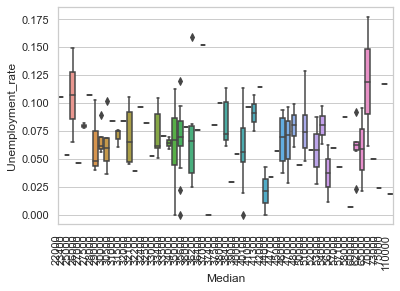

In [ ]:
# Use a box plot to explore the distributions of median salaries and unemployment rate. 
sns.set(style='whitegrid')
sns.boxplot(x="Median", y="Unemployment_rate", data=recent_grads)
plt.xticks(rotation=90, ha='right')

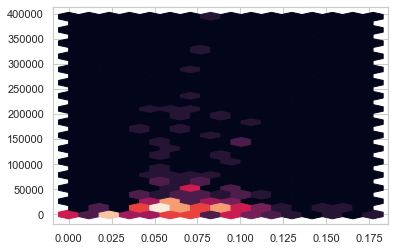

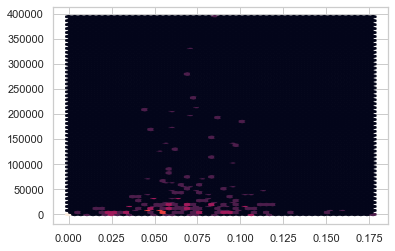

In [ ]:
# data
x = recent_grads['Unemployment_rate']
y = recent_grads['Total']

# Make the plot
plt.hexbin(x, y, gridsize=(15,15))
plt.show()
 
# We can control the size of the bins:
plt.hexbin(x, y, gridsize=(50,50))
plt.show()

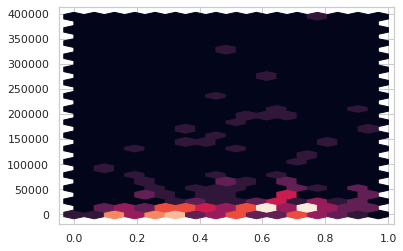

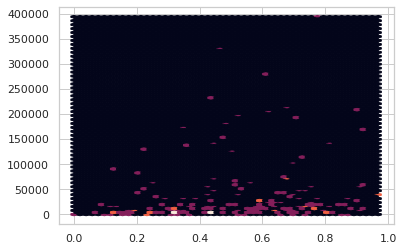

In [242]:
# data
x = recent_grads['ShareWomen']
y = recent_grads['Total']

# Make the plot
plt.hexbin(x, y, gridsize=(15,15))
plt.show()
 
# We can control the size of the bins:
plt.hexbin(x, y, gridsize=(50,50))
plt.show()

In [243]:
# View unique list of Majors
print(np.sort(recent_grads['Major'].unique()))

print(f"\n\nNumber of unique Majors: {recent_grads['Major'].nunique()}")

['ACCOUNTING' 'ACTUARIAL SCIENCE' 'ADVERTISING AND PUBLIC RELATIONS'
 'AEROSPACE ENGINEERING' 'AGRICULTURAL ECONOMICS'
 'AGRICULTURE PRODUCTION AND MANAGEMENT' 'ANIMAL SCIENCES'
 'ANTHROPOLOGY AND ARCHEOLOGY' 'APPLIED MATHEMATICS'
 'ARCHITECTURAL ENGINEERING' 'ARCHITECTURE'
 'AREA ETHNIC AND CIVILIZATION STUDIES' 'ART AND MUSIC EDUCATION'
 'ART HISTORY AND CRITICISM' 'ASTRONOMY AND ASTROPHYSICS'
 'ATMOSPHERIC SCIENCES AND METEOROLOGY' 'BIOCHEMICAL SCIENCES'
 'BIOLOGICAL ENGINEERING' 'BIOLOGY' 'BIOMEDICAL ENGINEERING' 'BOTANY'
 'BUSINESS ECONOMICS' 'BUSINESS MANAGEMENT AND ADMINISTRATION'
 'CHEMICAL ENGINEERING' 'CHEMISTRY' 'CIVIL ENGINEERING'
 'CLINICAL PSYCHOLOGY' 'COGNITIVE SCIENCE AND BIOPSYCHOLOGY'
 'COMMERCIAL ART AND GRAPHIC DESIGN'
 'COMMUNICATION DISORDERS SCIENCES AND SERVICES'
 'COMMUNICATION TECHNOLOGIES' 'COMMUNICATIONS'
 'COMMUNITY AND PUBLIC HEALTH' 'COMPOSITION AND RHETORIC'
 'COMPUTER ADMINISTRATION MANAGEMENT AND SECURITY'
 'COMPUTER AND INFORMATION SYSTEMS' 'COMPUTER 